# The Big Picture - Describing Networks

## Global structure

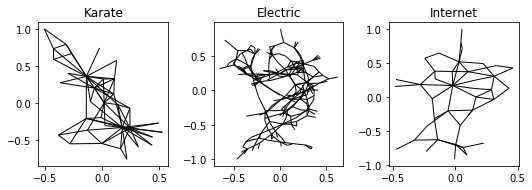

[[0, 8, 33], [0, 13, 33], [0, 19, 33], [0, 31, 33]]
2
Shortest path between 0 and 33 (karate) 2
Average shortest path (karate):  2.408199643493761
Diameter of karate & grid:  (5, 22)


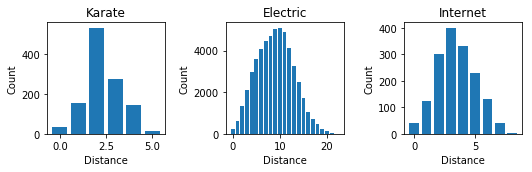

In [7]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from pathlib import Path
data_dir = Path('.') / 'data'

# Dataset 1: karate club
G_karate = nx.karate_club_graph()
mr_hi = 0
john_a = 33

# Dataset 2: German electrical grid
with open(str(data_dir / 'mureddu2016-0.2-branches.csv'), 'rb') as f:
  next(f) # Skip header
  G_electric = nx.read_edgelist(f, delimiter="\t", create_using=nx.Graph, 
                                data=[('X', float), ('Pmax', float)])

# Dataset 3: European GEANT Network
G_internet = nx.read_graphml(data_dir / 'geant2012.graphml')

# Plot all three nets
plt.figure(figsize=(7.5, 2.75))
plt.subplot(1, 3, 1)
plt.title("Karate")
nx.draw_networkx(G_karate, node_size=0, with_labels=False)
plt.subplot(1, 3, 2)
plt.title("Electric")
nx.draw_networkx(G_electric, node_size=0, with_labels=False)
plt.subplot(1, 3, 3)
plt.title("Internet")
nx.draw_networkx(G_internet, node_size=0, with_labels=False)
plt.tight_layout() # Adjust layout
plt.show()

# Shortest path/distance
print(list(nx.all_shortest_paths(G_karate, mr_hi, john_a)))
print(nx.shortest_path_length(G_karate, mr_hi, john_a))
len_src_target = dict(nx.shortest_path_length(G_karate))
print('Shortest path between 0 and 33 (karate)', len_src_target[0][33])

def path_length_histogram(G, title=None):
  len_src_target = dict(nx.shortest_path_length(G))
  all_shortest = sum(
      [list(len_target.values()) for len_target in len_src_target.values()], 
      [])
    
  # Calculate integer bins
  high = max(all_shortest)
  bins = [-0.5 + i for i in range(high + 2)]
  plt.hist(all_shortest, bins=bins, rwidth=0.8)
  plt.title(title)
  plt.xlabel("Distance")
  plt.ylabel("Count")

plt.figure(figsize=(7.5, 2.5))
plt.subplot(1, 3, 1)
path_length_histogram(G_karate, title="Karate")
plt.subplot(1, 3, 2)
path_length_histogram(G_electric, title="Electric")
plt.subplot(1, 3, 3)
path_length_histogram(G_internet, title="Internet")
plt.tight_layout()

print('Average shortest path (karate): ', nx.average_shortest_path_length(G_karate)) # 2.408199643493761
print('Diameter of karate & grid: ', (nx.diameter(G_karate), nx.diameter(G_electric)))  # (5,22))

### Cantralisation and inequality

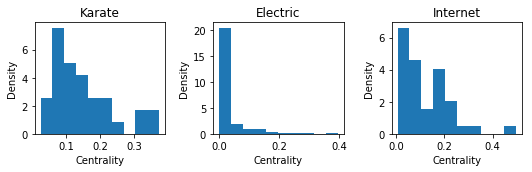

In [8]:
def centrality_histogram(x, title=None):
  plt.hist(x, density=True)
  plt.title(title)
  plt.xlabel("Centrality")
  plt.ylabel("Density")

# Create a figure
plt.figure(figsize=(7.5, 2.5))
# Calculate centralities for each example and plot
plt.subplot(1, 3, 1)
centrality_histogram(
nx.eigenvector_centrality(G_karate).values(), title="Karate")
plt.subplot(1, 3, 2)
centrality_histogram(
nx.eigenvector_centrality(G_electric, max_iter=1000).values(),
title="Electric")
plt.subplot(1, 3, 3)
centrality_histogram(
nx.eigenvector_centrality(G_internet).values(), title="Internet")
# Adjust the layout
plt.tight_layout()

### Cliques and k-cores

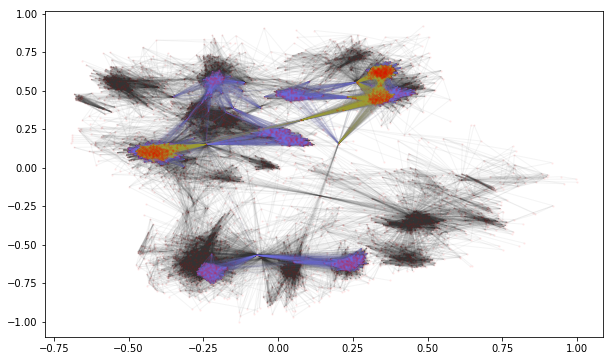

In [9]:
G_social = nx.read_edgelist(data_dir / 'mcauley2020-facebook-combined.txt')

G_core_30 = nx.k_core(G_social, 30)
G_core_60 = nx.k_core(G_social, 60)

pos = nx.spring_layout(G_social,k=0.1)

plt.figure(figsize=(10,6))
nx.draw_networkx(
G_social, pos=pos, node_size=2,
edge_color="#333333", alpha=0.05, with_labels=False)
nx.draw_networkx(
G_core_30, pos=pos, node_size=2,
edge_color="#7F7FEF", alpha=0.05, with_labels=False)
nx.draw_networkx(
G_core_60, pos=pos, node_size=2,
edge_color="#AFAF33", alpha=0.05, with_labels=False)
plt.show()